## Credit Card Default Dataset - Data Cleaning
Steps:
1. Check missing values
2. Check undocumented labels in categorical variables
3. Check outliers in numerical variables
4. Export pre-processed training & testing data

In [35]:
!pip install imblearn

     |████████████████████████████████| 167 kB 23 kB/s eta 0:00:011


In [86]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt


### Load original datasets

In [103]:
path = '/Users/sylvia/Desktop/3/BENG0095 Data Mining/BENG0095 (202021) Group Coursework Brief-20201106/DataFiles/' # change to your local file location

df_train = pd.read_csv(path + 'CreditCard_train.csv', header = 1) # pass the second line in the CSV file as column names
df_train.rename(columns={'PAY_0':'PAY_1'}, inplace=True) # change strange (inconsistent) column name 'PAY_0'
df_train.rename(columns={'default payment next month':'default'}, inplace=True) # shorten the name of target column

df_test = pd.read_csv(path + 'CreditCard_test.csv', header=1)
df_test.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df_test.rename(columns={'default payment next month':'default'}, inplace=True)

In [93]:
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [94]:
df_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,24001,50000,1,2,2,23,2,2,0,0,...,44116,21247,20066,8,2401,2254,2004,704,707,0
1,24002,60000,1,2,2,26,0,0,0,0,...,55736,26958,28847,2282,2324,2049,2000,3000,1120,1
2,24003,400000,1,2,2,27,0,0,0,0,...,10745,20737,9545,2501,10009,1437,1105,510,959,0
3,24004,20000,1,5,2,27,5,4,3,2,...,19709,20113,19840,0,0,0,900,0,0,0
4,24005,50000,1,3,2,27,0,0,-2,-2,...,0,70,120,0,100,0,70,200,100,0


### Check missing values

In [117]:
df_train.isnull().any()

ID           False
LIMIT_BAL    False
SEX          False
EDUCATION    False
MARRIAGE     False
AGE          False
PAY_1        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5        False
PAY_6        False
BILL_AMT1    False
BILL_AMT2    False
BILL_AMT3    False
BILL_AMT4    False
BILL_AMT5    False
BILL_AMT6    False
PAY_AMT1     False
PAY_AMT2     False
PAY_AMT3     False
PAY_AMT4     False
PAY_AMT5     False
PAY_AMT6     False
default      False
dtype: bool

In [118]:
df_test.isnull().any()

ID           False
LIMIT_BAL    False
SEX          False
EDUCATION    False
MARRIAGE     False
AGE          False
PAY_1        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5        False
PAY_6        False
BILL_AMT1    False
BILL_AMT2    False
BILL_AMT3    False
BILL_AMT4    False
BILL_AMT5    False
BILL_AMT6    False
PAY_AMT1     False
PAY_AMT2     False
PAY_AMT3     False
PAY_AMT4     False
PAY_AMT5     False
PAY_AMT6     False
default      False
dtype: bool

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37260 entries, 0 to 37259
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         37260 non-null  int64
 1   LIMIT_BAL  37260 non-null  int64
 2   SEX        37260 non-null  int64
 3   EDUCATION  37260 non-null  int64
 4   MARRIAGE   37260 non-null  int64
 5   AGE        37260 non-null  int64
 6   PAY_1      37260 non-null  int64
 7   PAY_2      37260 non-null  int64
 8   PAY_3      37260 non-null  int64
 9   PAY_4      37260 non-null  int64
 10  PAY_5      37260 non-null  int64
 11  PAY_6      37260 non-null  int64
 12  BILL_AMT1  37260 non-null  int64
 13  BILL_AMT2  37260 non-null  int64
 14  BILL_AMT3  37260 non-null  int64
 15  BILL_AMT4  37260 non-null  int64
 16  BILL_AMT5  37260 non-null  int64
 17  BILL_AMT6  37260 non-null  int64
 18  PAY_AMT1   37260 non-null  int64
 19  PAY_AMT2   37260 non-null  int64
 20  PAY_AMT3   37260 non-null  int64
 21  PAY_AMT4   3

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         6000 non-null   int64
 1   LIMIT_BAL  6000 non-null   int64
 2   SEX        6000 non-null   int64
 3   EDUCATION  6000 non-null   int64
 4   MARRIAGE   6000 non-null   int64
 5   AGE        6000 non-null   int64
 6   PAY_1      6000 non-null   int64
 7   PAY_2      6000 non-null   int64
 8   PAY_3      6000 non-null   int64
 9   PAY_4      6000 non-null   int64
 10  PAY_5      6000 non-null   int64
 11  PAY_6      6000 non-null   int64
 12  BILL_AMT1  6000 non-null   int64
 13  BILL_AMT2  6000 non-null   int64
 14  BILL_AMT3  6000 non-null   int64
 15  BILL_AMT4  6000 non-null   int64
 16  BILL_AMT5  6000 non-null   int64
 17  BILL_AMT6  6000 non-null   int64
 18  PAY_AMT1   6000 non-null   int64
 19  PAY_AMT2   6000 non-null   int64
 20  PAY_AMT3   6000 non-null   int64
 21  PAY_AMT4   600

No missing values. All variables have numerical values (int64).

### Check undocumented labels

In [17]:
# check the range of variable values is well-documented
print('SEX:', sorted(df_train['SEX'].unique()))
print('EDUCATION:', sorted(df_train['EDUCATION'].unique()))
print('MARRIAGE:', sorted(df_train['MARRIAGE'].unique()))
print('PAY_1:', sorted(df_train['PAY_1'].unique()))
print('PAY_2:', sorted(df_train['PAY_2'].unique()))
print('PAY_3:', sorted(df_train['PAY_3'].unique()))
print('PAY_4:', sorted(df_train['PAY_4'].unique()))
print('PAY_5:', sorted(df_train['PAY_5'].unique()))
print('PAY_6:', sorted(df_train['PAY_6'].unique()))
print('default:', sorted(df_train['default'].unique()))

SEX: [1, 2]
EDUCATION: [0, 1, 2, 3, 4, 5, 6]
MARRIAGE: [0, 1, 2, 3]
PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
default: [0, 1]


In [15]:
# check the range of variable values is well-documented
print('SEX:', sorted(df_test['SEX'].unique()))
print('EDUCATION:', sorted(df_test['EDUCATION'].unique()))
print('MARRIAGE:', sorted(df_test['MARRIAGE'].unique()))
print('PAY_1:', sorted(df_test['PAY_1'].unique()))
print('PAY_2:', sorted(df_test['PAY_2'].unique()))
print('PAY_3:', sorted(df_test['PAY_3'].unique()))
print('PAY_4:', sorted(df_test['PAY_4'].unique()))
print('PAY_5:', sorted(df_test['PAY_5'].unique()))
print('PAY_6:', sorted(df_test['PAY_6'].unique()))
print('default:', sorted(df_test['default'].unique()))

SEX: [1, 2]
EDUCATION: [0, 1, 2, 3, 4, 5, 6]
MARRIAGE: [0, 1, 2, 3]
PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
PAY_3: [-2, -1, 0, 2, 3, 4, 5, 6, 8]
PAY_4: [-2, -1, 0, 2, 3, 4, 5, 7]
PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7]
PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7]
default: [0, 1]


**Undocumented categories:**
- **EDUCATION**: 0, 5, 6
- **MARRIAGE**: 0
- **PAY_1** to **PAY_6**: -2, 0
***
**Solution:**
- **EDUCATION**: categorise 0, 5, 6 as 4 (**others**)
<br> **others** may refer to education level either higher than graduate school or lower than high school.
- **MARRIAGE**: categorise 0 as 3 (**others**)
- **PAY_1** to **PAY_6**: categorise -2, 0 as -1 (**pay duly**)

In [18]:
df_train.loc[(df_train['EDUCATION'] == 0) | (df_train['EDUCATION'] == 5) | (df_train['EDUCATION'] == 6), 'EDUCATION'] = 4
df_train.loc[df_train['MARRIAGE'] == 0, 'MARRIAGE'] = 3

print('EDUCATION:', sorted(df_train['EDUCATION'].unique()))
print('MARRIAGE:', sorted(df_train['MARRIAGE'].unique()))

EDUCATION: [1, 2, 3, 4]
MARRIAGE: [1, 2, 3]


In [19]:
df_test.loc[(df_test['EDUCATION'] == 0) | (df_test['EDUCATION'] == 5) | (df_test['EDUCATION'] == 6), 'EDUCATION'] = 4
df_test.loc[df_test['MARRIAGE'] == 0, 'MARRIAGE'] = 3

print('EDUCATION:', sorted(df_test['EDUCATION'].unique()))
print('MARRIAGE:', sorted(df_test['MARRIAGE'].unique()))

EDUCATION: [1, 2, 3, 4]
MARRIAGE: [1, 2, 3]


In [20]:
df_train.loc[(df_train['PAY_1'] == -2) | (df_train['PAY_1'] == 0), 'PAY_1'] = -1
df_train.loc[(df_train['PAY_2'] == -2) | (df_train['PAY_2'] == 0), 'PAY_2'] = -1
df_train.loc[(df_train['PAY_3'] == -2) | (df_train['PAY_3'] == 0), 'PAY_3'] = -1
df_train.loc[(df_train['PAY_4'] == -2) | (df_train['PAY_4'] == 0), 'PAY_4'] = -1
df_train.loc[(df_train['PAY_5'] == -2) | (df_train['PAY_5'] == 0), 'PAY_5'] = -1
df_train.loc[(df_train['PAY_6'] == -2) | (df_train['PAY_6'] == 0), 'PAY_6'] = -1

print('PAY_1:', sorted(df_train['PAY_1'].unique()))
print('PAY_2:', sorted(df_train['PAY_2'].unique()))
print('PAY_3:', sorted(df_train['PAY_3'].unique()))
print('PAY_4:', sorted(df_train['PAY_4'].unique()))
print('PAY_5:', sorted(df_train['PAY_5'].unique()))
print('PAY_6:', sorted(df_train['PAY_6'].unique()))

PAY_1: [-1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3: [-1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4: [-1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5: [-1, 2, 3, 4, 5, 6, 7, 8]
PAY_6: [-1, 2, 3, 4, 5, 6, 7, 8]


In [21]:
df_test.loc[(df_test['PAY_1'] == -2) | (df_test['PAY_1'] == 0), 'PAY_1'] = -1
df_test.loc[(df_test['PAY_2'] == -2) | (df_test['PAY_2'] == 0), 'PAY_2'] = -1
df_test.loc[(df_test['PAY_3'] == -2) | (df_test['PAY_3'] == 0), 'PAY_3'] = -1
df_test.loc[(df_test['PAY_4'] == -2) | (df_test['PAY_4'] == 0), 'PAY_4'] = -1
df_test.loc[(df_test['PAY_5'] == -2) | (df_test['PAY_5'] == 0), 'PAY_5'] = -1
df_test.loc[(df_test['PAY_6'] == -2) | (df_test['PAY_6'] == 0), 'PAY_6'] = -1

print('PAY_1:', sorted(df_test['PAY_1'].unique()))
print('PAY_2:', sorted(df_test['PAY_2'].unique()))
print('PAY_3:', sorted(df_test['PAY_3'].unique()))
print('PAY_4:', sorted(df_test['PAY_4'].unique()))
print('PAY_5:', sorted(df_test['PAY_5'].unique()))
print('PAY_6:', sorted(df_test['PAY_6'].unique()))

PAY_1: [-1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-1, 1, 2, 3, 4, 5, 6, 7]
PAY_3: [-1, 2, 3, 4, 5, 6, 8]
PAY_4: [-1, 2, 3, 4, 5, 7]
PAY_5: [-1, 2, 3, 4, 5, 6, 7]
PAY_6: [-1, 2, 3, 4, 5, 6, 7]


### Check outliers in numerical variables

In [22]:
# Amount of the given credit description
df_train[['LIMIT_BAL']].describe()
# alternative: histogram

,LIMIT_BAL
count,24000.000000
mean,165495.986667
std,129128.744855
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


In [23]:
# Amount of bill statement description
df_train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()
# alternative: histogram

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,50596.884708,48646.064125,4.636706e+04,42368.188417,40000.682542,38563.710625
std,72649.374256,70364.600436,6.819390e+04,63070.680934,60345.012766,59155.759799
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3631.500000,3098.500000,2.773500e+03,2340.000000,1740.000000,1234.750000
50%,22330.000000,21339.000000,2.003900e+04,18940.500000,18107.500000,17036.000000
75%,65779.500000,62761.250000,5.929800e+04,52188.500000,49746.500000,48796.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Why there are negative values in bill statement? Can they be interpreted as credit?

In [26]:
# Amount of previous payment description
df_train[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()\
                                        .apply(lambda s: s.apply(lambda x: format(x, 'f'))) # suppress scientific notation
# alternative: histogram

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,5542.912917,5815.336208,4969.266000,4743.480042,4783.486042,5189.399042
std,15068.576072,20797.031923,16095.614340,14883.269990,15270.405279,17630.371990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,800.000000,379.000000,279.750000,244.000000,60.750000
50%,2100.000000,2000.000000,1702.500000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5000.000000,4347.250000,4000.000000,4005.000000,4000.000000
max,505000.000000,1684259.000000,896040.000000,497000.000000,417990.000000,528666.000000


LIMIT_BAL, BILL_AMT and PAY_AMT all have a very broad range. Need to check if these are outliers - check if the amount of bill statement & previous payment lies within the 'sensible' range of given credit. Choose values **below 5th percentile** or **above 95th percentile**.

In [33]:
for var in ['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
    percentiles = list(np.percentile(df_train[var], i) for i in range(5,100,10))
    print('{} percentiles:'.format(var), list('%.2f' % elem for elem in percentiles))

LIMIT_BAL percentiles: ['20000.00', '50000.00', '50000.00', '80000.00', '120000.00', '150000.00', '200000.00', '240000.00', '300000.00', '430000.00']
PAY_AMT1 percentiles: ['0.00', '0.00', '1000.00', '1500.00', '2000.00', '2550.00', '3510.40', '5000.00', '8000.00', '18243.85']
PAY_AMT2 percentiles: ['0.00', '0.00', '800.00', '1379.00', '1885.55', '2390.90', '3300.00', '5000.00', '7784.15', '19000.15']
PAY_AMT3 percentiles: ['0.00', '0.00', '379.00', '1000.00', '1424.10', '2000.00', '3000.00', '4347.25', '6800.00', '16513.55']
PAY_AMT4 percentiles: ['0.00', '0.00', '279.75', '764.65', '1100.00', '1920.00', '2728.35', '4000.00', '6200.00', '16000.00']
PAY_AMT5 percentiles: ['0.00', '0.00', '244.00', '780.00', '1170.00', '2000.00', '2832.70', '4005.00', '6251.15', '15963.75']
PAY_AMT6 percentiles: ['0.00', '0.00', '60.75', '690.00', '1065.00', '1911.90', '2711.00', '4000.00', '6100.00', '17398.10']


In [24]:
def check_outliers(field:str):
    data = df_train[(df_train[field] < np.percentile(df_train[field], 5)) | (df_train[field] > np.percentile(df_train[field], 95))]\
             [['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2']]
        
    data_out_of_range = []
    for i in data.index.values.tolist():
        limit_bal = df_train.loc[i, 'LIMIT_BAL']
        bill_amt1 = df_train.loc[i, 'BILL_AMT1']
        bill_amt2 = df_train.loc[i, 'BILL_AMT2']
        pay_amt1 = df_train.loc[i, 'PAY_AMT1']
        pay_amt2 = df_train.loc[i, 'PAY_AMT2']

        if (limit_bal < bill_amt1) | (limit_bal < bill_amt2) | (limit_bal < pay_amt1) | (limit_bal < pay_amt2):
            data_out_of_range.append(i)
    
    print('large (out-of-the-credit) values in', field, ':', len(data_out_of_range))
    return df_train.loc[data_out_of_range, ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2', 'default']].sort_values(by=['LIMIT_BAL'])

In [25]:
check_outliers('LIMIT_BAL')

large (out-of-the-credit) values in LIMIT_BAL : 75


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,PAY_AMT1,PAY_AMT2,default
293,10000,7015,10227,3507,0,1
8699,10000,14498,7512,2248,1120,0
9078,10000,9269,10400,1400,0,1
9434,10000,656,8748,10128,1200,0
9503,10000,10281,9949,25,4000,0
...,...,...,...,...,...,...
360,500000,507726,509229,10000,0,1
2907,500000,499231,511629,22600,501,1
8172,500000,504644,512650,22650,0,1
20892,550000,539092,552234,23000,23000,0


Seems like there aren't anomalies. Just the case that clients with a restricted amount of or a lot of money.

Probability of default is 1 in data:  0.22375
Counter({0: 18630, 1: 5370})


<AxesSubplot:>

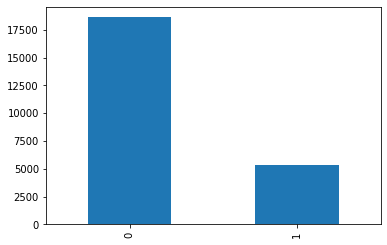

In [40]:
print(Counter(df_train['default']))

print("Probability of default is 1 in traing data: ", df_train['default'].sum() / len(df_train['default']))
df_train['default'].value_counts().plot.bar()

We have a inbalanced 2-class classification problem, so try **SMOTE** to balance the data

In [112]:
# oversample
oversample = SMOTE()
y_train = df_train['default'].copy()
X_train = df_train.copy()
X_train.drop(['default', 'ID'], axis = 1)
X_smote, y_smote = oversample.fit_sample(X_train, y_train)
print(Counter(y_smote))
df_train = X_smote

Counter({1: 18630, 0: 18630})


Probability of default is 1 in traing data:  0.5


<AxesSubplot:>

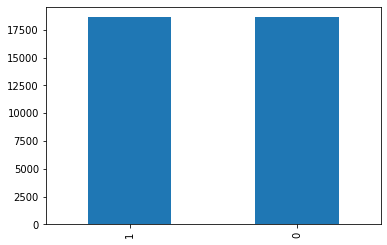

In [111]:
print("Probability of default is 1 in traing data: ", df_train['default'].sum() / len(df_train['default']))
df_train['default'].value_counts().plot.bar()

### Save pre-processed datasets

In [26]:
# save pre-processed training & testing data
df_train.to_csv(path + 'CreditCard_train_processed.csv', index=False)
df_test.to_csv(path + 'CreditCard_test_processed.csv', index=False)